 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [129]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [130]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv( whale_returns_csv, index_col="Date", infer_datetime_format = True, parse_dates = True)
whale_returns_df.sort_index(inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [131]:
print(type(whale_returns_df))

<class 'pandas.core.frame.DataFrame'>


In [132]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [133]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [134]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv( algo_returns_csv, index_col="Date", infer_datetime_format = True, parse_dates = True)
algo_returns_df.sort_index(inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [135]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [136]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [137]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv( sp500_history_csv, index_col="Date", infer_datetime_format = True, parse_dates = True)
sp500_history_df.sort_index(inplace = True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [138]:
# Check Data Types
# YOUR CODE HERE
pd.DataFrame(sp500_history_df).dtypes

Close    object
dtype: object

In [139]:
# Fix Data Types
# YOUR CODE HERE
#Custome function below was borrowed from https://pbpython.com/pandas_dtypes.html (Section Titled: "Custom Conversion Functions")
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

sp500_history_df['Close'] = sp500_history_df['Close'].apply(convert_currency)
pd.DataFrame(sp500_history_df).dtypes

Close    float64
dtype: object

In [140]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_returns_sp500 = sp500_history_df.pct_change()
daily_returns_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [141]:
# Drop nulls
# YOUR CODE HERE
daily_returns_sp500 = daily_returns_sp500.dropna()
daily_returns_sp500.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [142]:
# Rename Column
# YOUR CODE HERE
daily_returns_sp500 = daily_returns_sp500.rename(columns={'Close':'S&P 500'})
daily_returns_sp500.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [143]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
all_returns = pd.concat([whale_returns_df,algo_returns_df,daily_returns_sp500], axis='columns', join='inner')
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

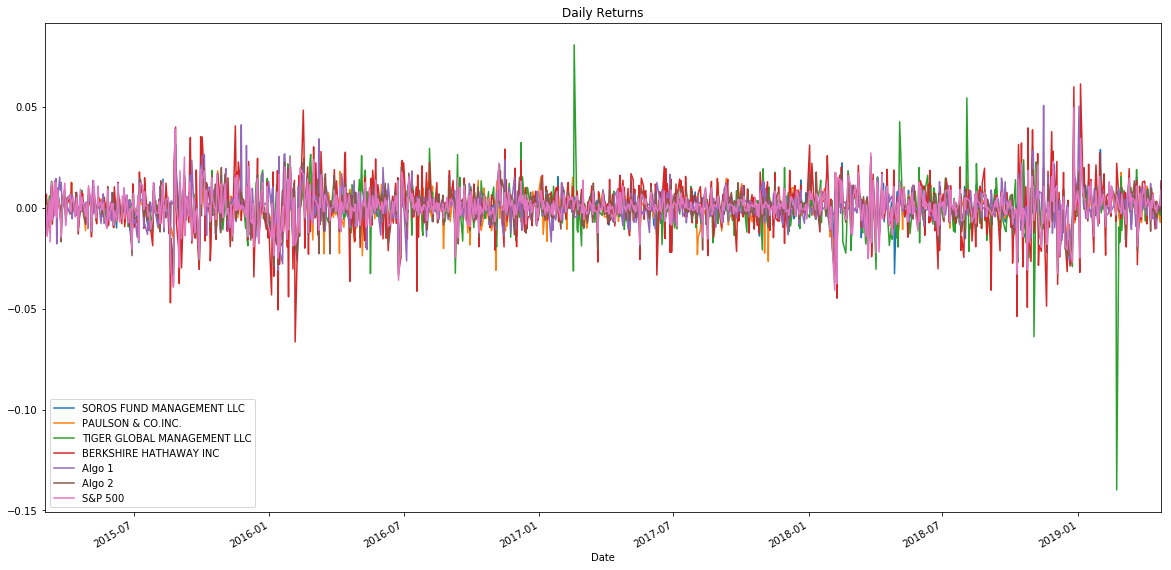

In [144]:
# Plot daily returns
# YOUR CODE HERE
all_returns.plot(figsize=(20,10), title="Daily Returns")

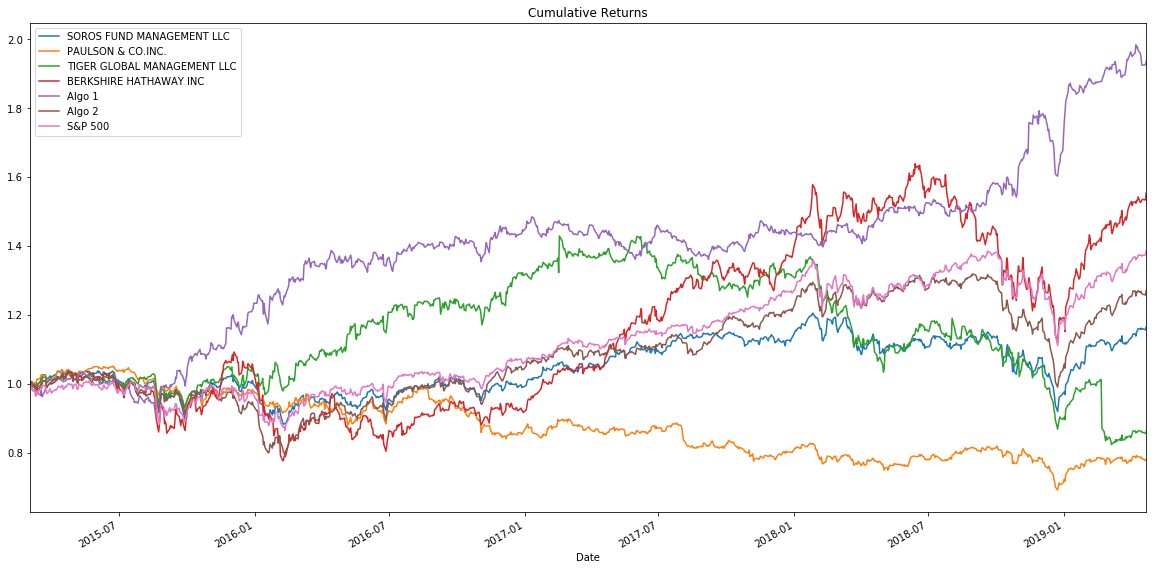

In [145]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + all_returns).cumprod()
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

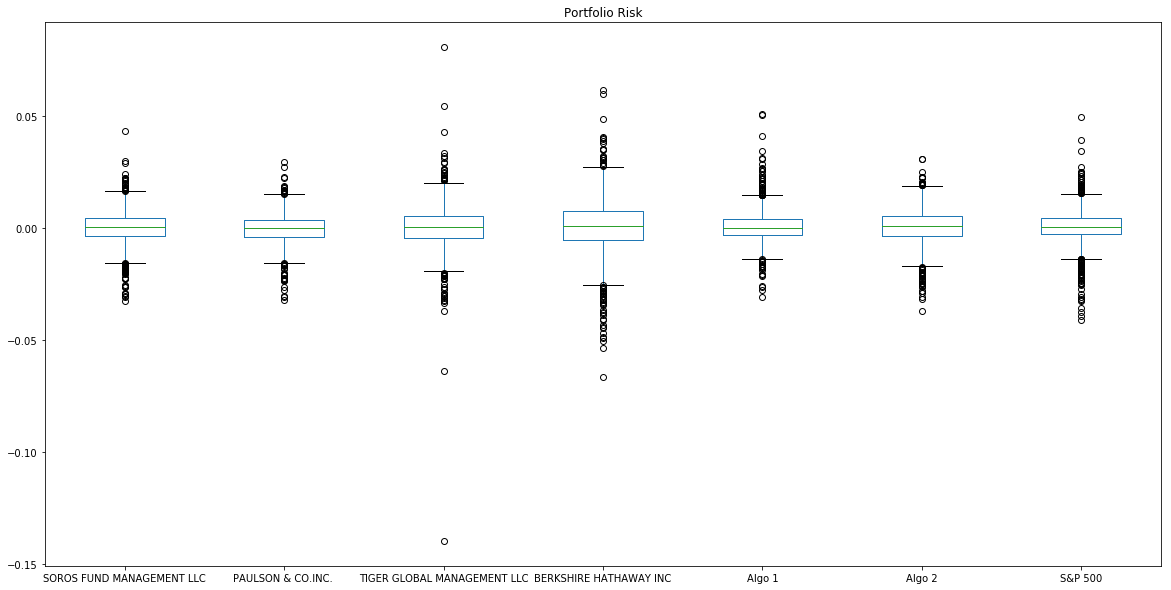

In [146]:
# Box plot to visually show risk
# YOUR CODE HERE
all_returns.plot(figsize=(20,10),kind='box', title="Portfolio Risk")

In [147]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
all_portfolio_std = all_returns.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [148]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
sp_500_std = all_portfolio_std['S&P 500']
all_portfolio_std.loc[(all_portfolio_std>sp_500_std)] 

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [149]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
portfolio_annual_std = all_portfolio_std * np.sqrt(252)
portfolio_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

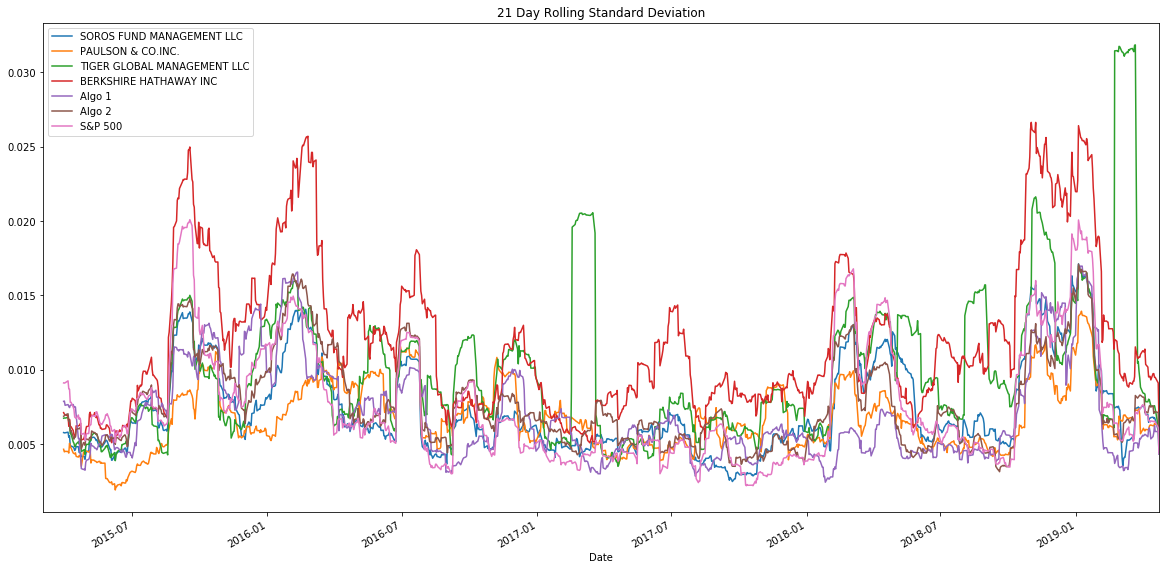

In [150]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE

portfolio_std_21 = all_returns.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")
portfolio_std_21


In [151]:
# Construct a correlation table
# YOUR CODE HERE
portfolio_corr = all_returns.corr()
portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


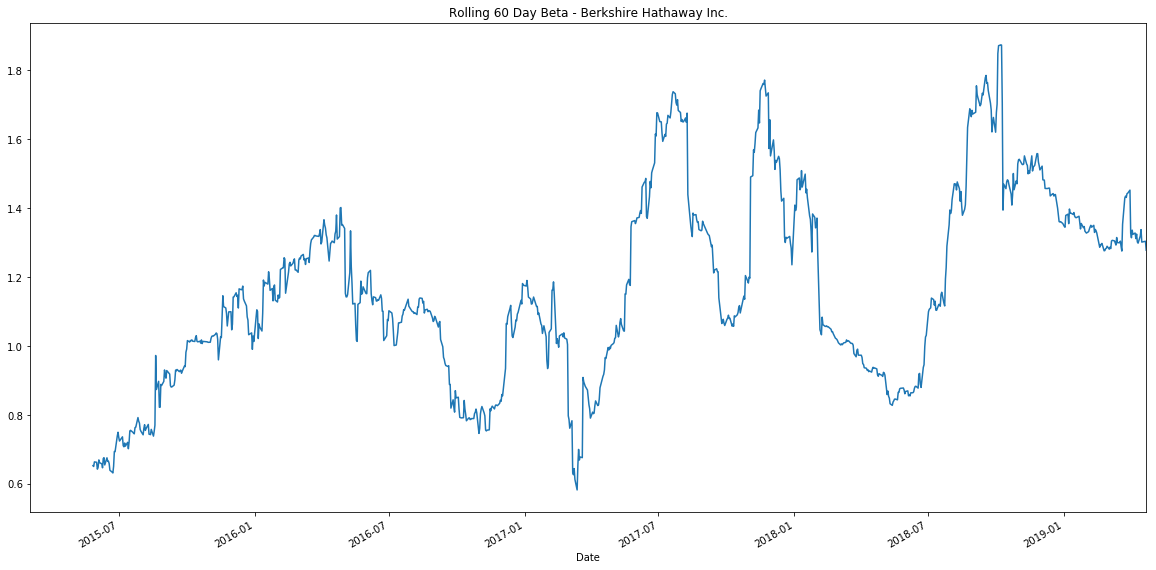

In [152]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
bhinc_covariance = all_returns["BERKSHIRE HATHAWAY INC"].cov(all_returns["S&P 500"])
sp500_variance = all_returns["S&P 500"].var()
bhinc_beta = bhinc_covariance / sp500_variance

rolling60_BHinc_cov = all_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(all_returns["S&P 500"])
rolling60_SP500_var = all_returns["S&P 500"].rolling(window=60).var()
rolling60_BHinc_beta = rolling60_BHinc_cov / rolling60_SP500_var
rolling60_BHinc_beta.plot(figsize = (20,10), title="Rolling 60 Day Beta - Berkshire Hathaway Inc.")


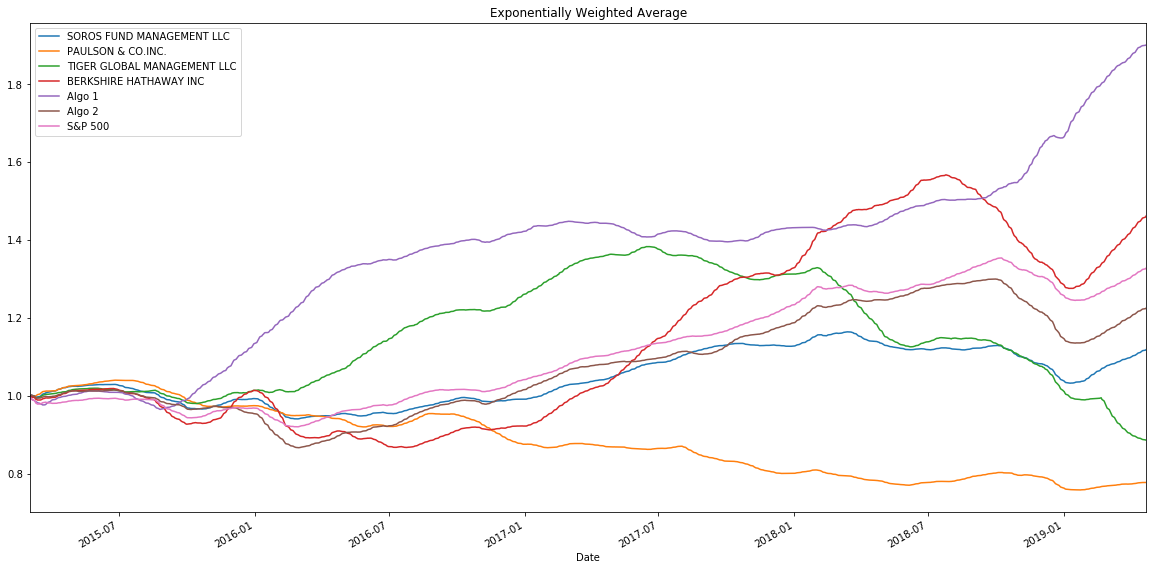

In [180]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
ewm_returns = pd.Series.ewm(cumulative_returns, halflife=21).mean()
ewm_returns.plot(figsize = (20,10), title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [154]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

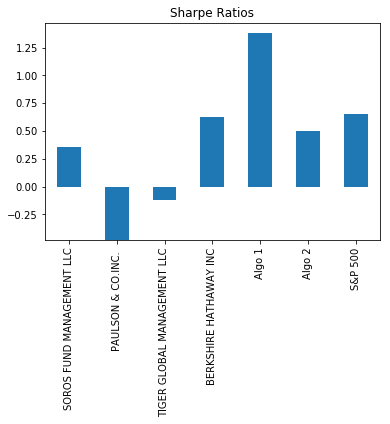

In [155]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot.bar(title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: 

Only one of the Algo strategies (Algo 1) outperformed both the S&P 500 and all of the whales. The strategy used by Algo 2 outperforms three out of the four whale funds but does not outperforms the S&P 500 or Berkshire Hathaway Inc.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [156]:
# Read the first stock
# YOUR CODE HERE
amzn_csv = Path("Resources/AMZN.csv")
amzn_df = pd.read_csv(amzn_csv, index_col="Date",infer_datetime_format=True)
amzn_df.head()


,AMZN
Date,
3/3/2015,384.61
3/4/2015,382.72
3/5/2015,387.83
3/6/2015,380.09
3/9/2015,378.56


In [157]:
# Read the second stock
# YOUR CODE HERE
jpm_csv = Path("Resources/JPM.csv")
jpm_df = pd.read_csv(jpm_csv, index_col="Date",infer_datetime_format=True)
jpm_df.head()

,JPM
Date,
3/3/2015,61.97
3/4/2015,62.13
3/5/2015,62.00
3/6/2015,60.89
3/9/2015,61.50


In [158]:
# Read the third stock
# YOUR CODE HERE
wal_csv = Path("Resources/WAL.csv")
wal_df = pd.read_csv(wal_csv, index_col="Date",infer_datetime_format=True)
wal_df.head()

,WAL
Date,
3/3/2015,29.02
3/4/2015,28.66
3/5/2015,28.73
3/6/2015,29.02
3/9/2015,29.38


In [159]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_portfolio = pd.concat([amzn_df,jpm_df,wal_df],axis = 'columns', join='inner')
my_portfolio.head()

,AMZN,JPM,WAL
Date,,,
3/3/2015,384.61,61.97,29.02
3/4/2015,382.72,62.13,28.66
3/5/2015,387.83,62.00,28.73
3/6/2015,380.09,60.89,29.02
3/9/2015,378.56,61.50,29.38


In [160]:
my_portfolio_returns = my_portfolio.pct_change().dropna()
my_portfolio_returns.head()

,AMZN,JPM,WAL
Date,,,
3/4/2015,-0.004914,0.002582,-0.012405
3/5/2015,0.013352,-0.002092,0.002442
3/6/2015,-0.019957,-0.017903,0.010094
3/9/2015,-0.004025,0.010018,0.012405
3/10/2015,-0.023906,-0.025041,-0.028591


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [161]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_weighted_returns = my_portfolio_returns.dot(weights)
my_weighted_returns.head()

Date
3/4/2015    -0.004912
3/5/2015     0.004567
3/6/2015    -0.009255
3/9/2015     0.006133
3/10/2015   -0.025846
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [162]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_returns = pd.concat([all_returns, my_weighted_returns], axis = 'columns', join='inner')
all_returns = all_returns.rename(columns={0:'My Portfolio'})
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.004912
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.004567
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.009255
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.006133
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.025846


In [173]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_returns = all_returns.dropna()

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [175]:
# Risk
# YOUR CODE HERE
all_portfolio_std = all_returns.std()
all_portfolio_std

#Show portfolio's riskier than the S&P 500
sp_500_std = all_portfolio_std['S&P 500']
all_portfolio_std.loc[(all_portfolio_std>sp_500_std)] 

TIGER GLOBAL MANAGEMENT LLC    0.010903
BERKSHIRE HATHAWAY INC         0.012923
My Portfolio                   0.013076
dtype: float64

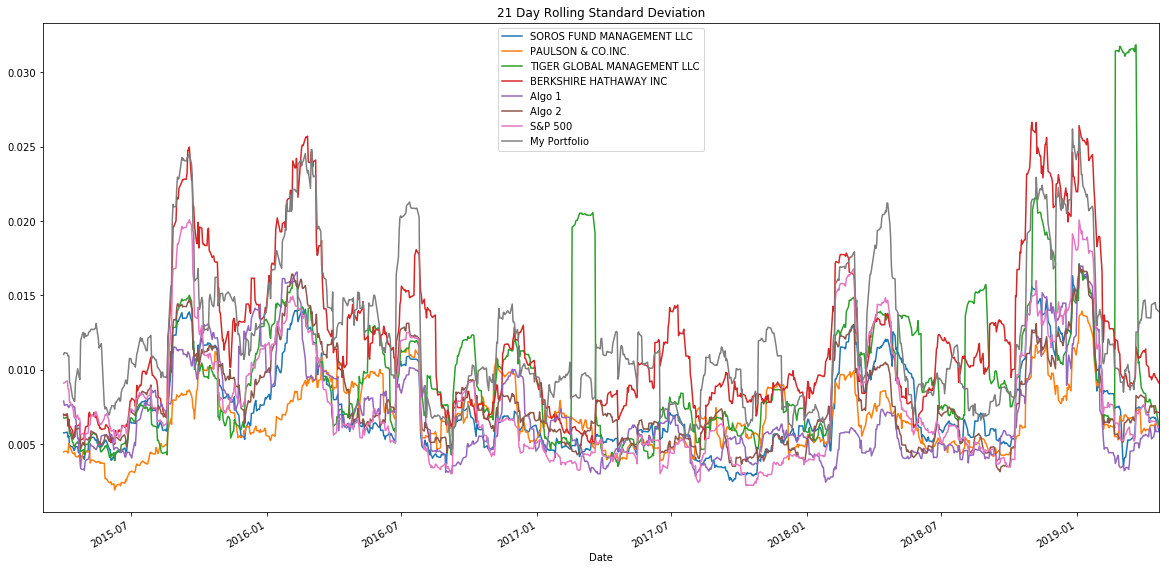

In [176]:
# Rolling
# YOUR CODE HERE
portfolio_std_21 = all_returns.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")
portfolio_std_21


In [177]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.345506
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
BERKSHIRE HATHAWAY INC         0.614872
Algo 1                         1.374206
Algo 2                         0.486307
S&P 500                        0.641630
My Portfolio                   1.177091
dtype: float64

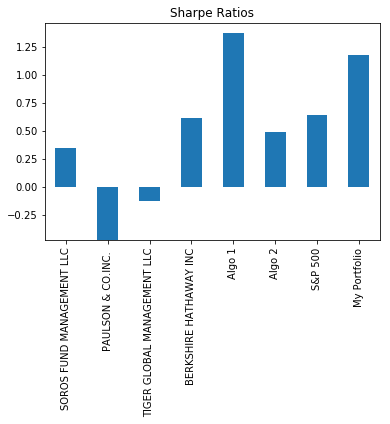

In [178]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [179]:
# Create a correlation analysis
# YOUR CODE HERE
portfolio_corr = all_returns.corr()
portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699870,0.561043,0.754182,0.320864,0.826726,0.837776,0.689041
PAULSON & CO.INC.,0.699870,1.000000,0.434380,0.545294,0.268483,0.678147,0.669517,0.539193
TIGER GLOBAL MANAGEMENT LLC,0.561043,0.434380,1.000000,0.424166,0.164111,0.507161,0.623853,0.453045
BERKSHIRE HATHAWAY INC,0.754182,0.545294,0.424166,1.000000,0.291557,0.687785,0.751062,0.651758
Algo 1,0.320864,0.268483,0.164111,0.291557,1.000000,0.287823,0.279002,0.270873
Algo 2,0.826726,0.678147,0.507161,0.687785,0.287823,1.000000,0.858683,0.740709
S&P 500,0.837776,0.669517,0.623853,0.751062,0.279002,0.858683,1.000000,0.813903
My Portfolio,0.689041,0.539193,0.453045,0.651758,0.270873,0.740709,0.813903,1.000000


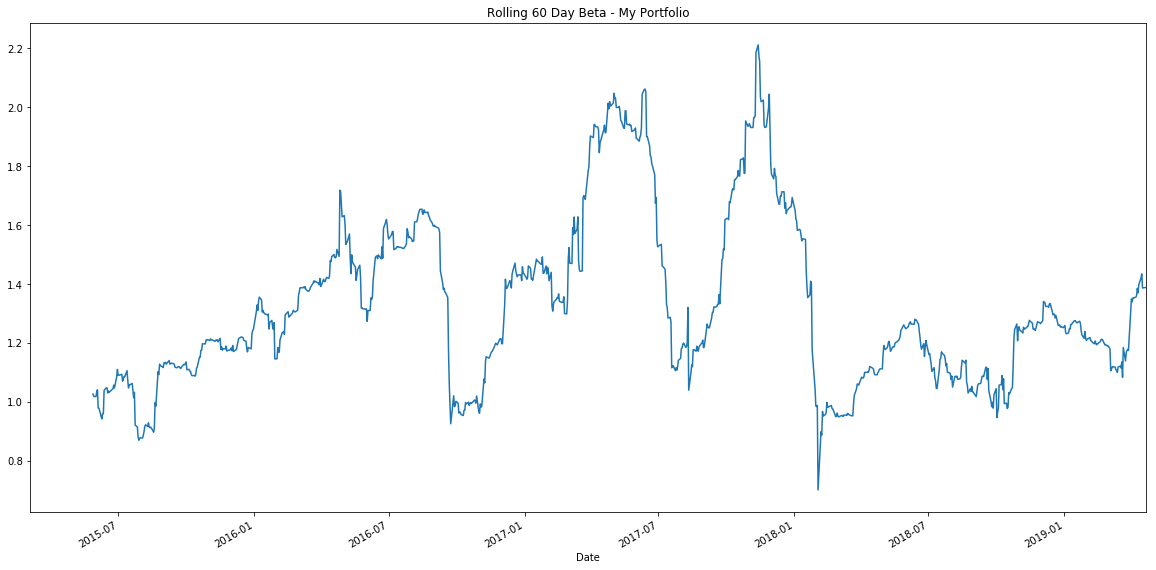

In [174]:
# Beta
# YOUR CODE HERE
my_covariance = all_returns["My Portfolio"].cov(all_returns["S&P 500"])
sp500_variance = all_returns["S&P 500"].var()
my_beta = my_covariance / sp500_variance

rolling60_my_cov = all_returns["My Portfolio"].rolling(window=60).cov(all_returns["S&P 500"])
rolling60_SP500_var = all_returns["S&P 500"].rolling(window=60).var()
rolling60_my_beta = rolling60_my_cov / rolling60_SP500_var
rolling60_my_beta.plot(figsize = (20,10), title="Rolling 60 Day Beta - My Portfolio")